In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('Natural_gas.csv')
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.Date)
# Change the index to the date column
df.index = pd.PeriodIndex(df.Date, freq='M')

/var/folders/02/twqmrqvd1z57402jq2k000vr0000gn/T/ipykernel_2854/3783245871.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.date = pd.DatetimeIndex(df.Date)


In [2]:
df=pd.read_csv('natural_gas.csv')

In [3]:
df.head(5)

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [4]:
df.tail(5)

,Date,Price
5948,2020-08-26,2.52
5949,2020-08-27,2.52
5950,2020-08-28,2.46
5951,2020-08-31,2.30
5952,2020-09-01,2.22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5953 non-null   object 
 1   Price   5952 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.1+ KB


In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13
...,...,...,...,...,...
5948,2020-08-26,2.52,2020,8,26
5949,2020-08-27,2.52,2020,8,27
5950,2020-08-28,2.46,2020,8,28
5951,2020-08-31,2.30,2020,8,31


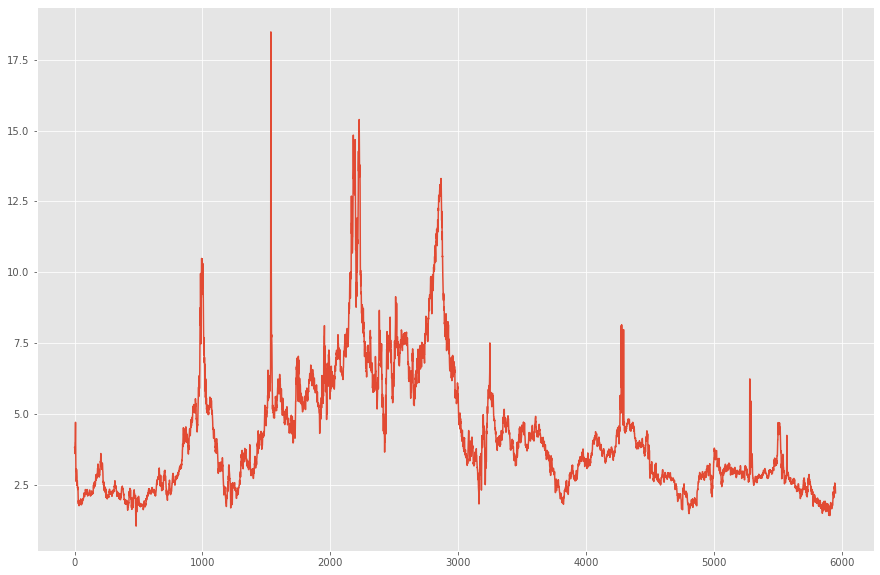

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.Price.plot()
df

In [8]:
#df.drop('Date', axis=1, inplace=True)

In [9]:
df.isnull().any()

Date     False
Price     True
year     False
month    False
day      False
dtype: bool

In [10]:
df.isnull().sum()

Date     0
Price    1
year     0
month    0
day      0
dtype: int64

In [11]:
df['Price'].fillna(df['Price'].mean(),inplace=True)

In [12]:
df.isnull().any()

Date     False
Price    False
year     False
month    False
day      False
dtype: bool

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


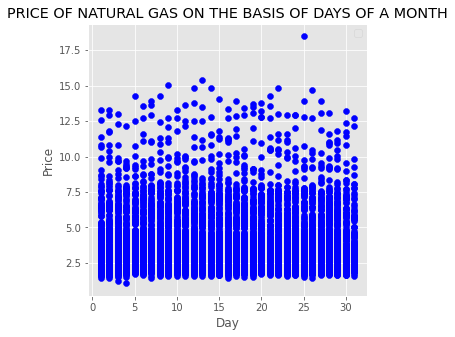

In [13]:
#import the matplotlib library
import matplotlib.pyplot as plt
#plot size
fig=plt.figure(figsize=(5,5))
plt.scatter(df['day'],df['Price'],color='blue')
#Set the label for the x-axis.
plt.xlabel('Day')
#Set the label for the y-axis.
plt.ylabel('Price')
#Set a title for the axes.
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF DAYS OF A MONTH')
#Place a legend on the axes.
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


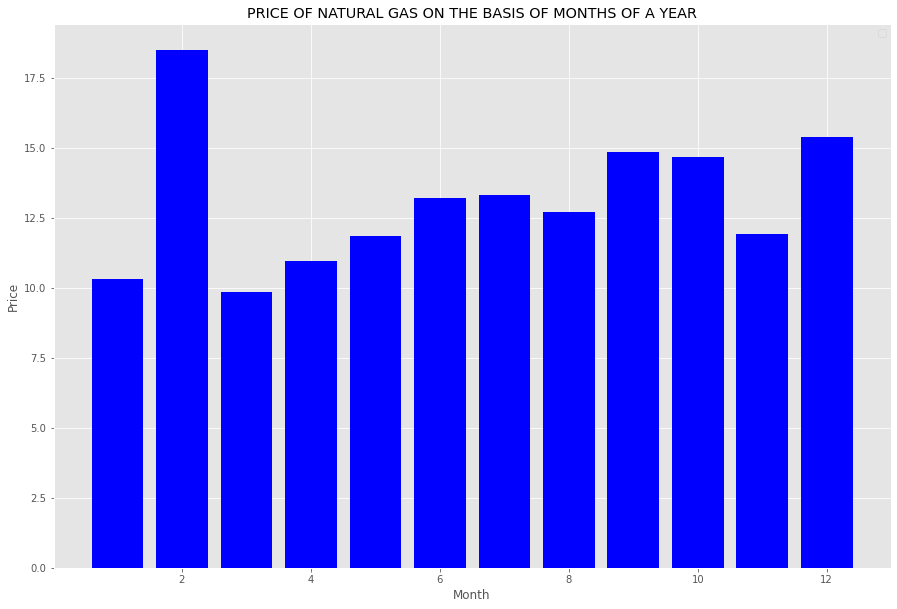

In [14]:
import matplotlib.pyplot as plt
plt.bar(df['month'],df['Price'],color='blue')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

<AxesSubplot:xlabel='year', ylabel='Price'>

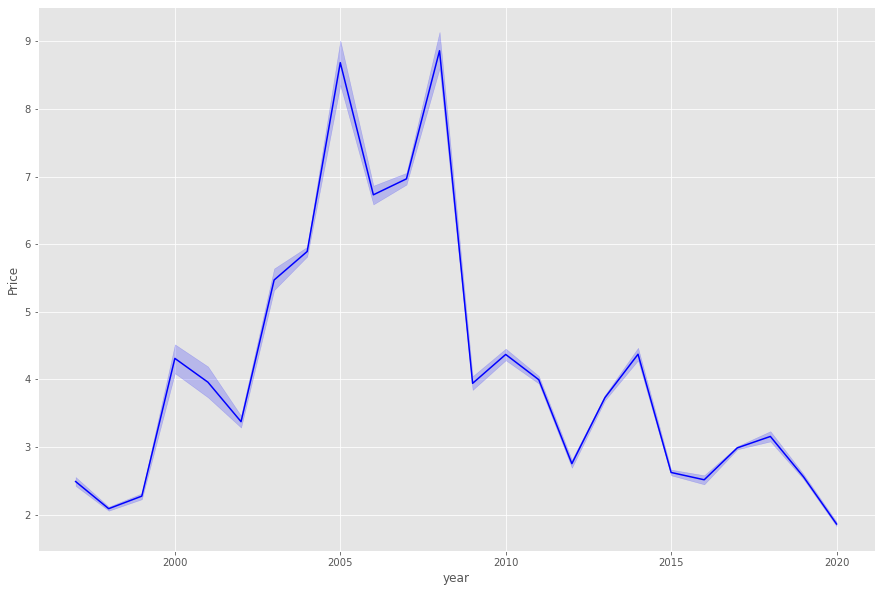

In [15]:
import seaborn as sns
sns.lineplot(x='year',y='Price',data=df,color='blue')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5953 non-null   datetime64[ns]
 1   Price   5953 non-null   float64       
 2   year    5953 non-null   int64         
 3   month   5953 non-null   int64         
 4   day     5953 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 232.7 KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


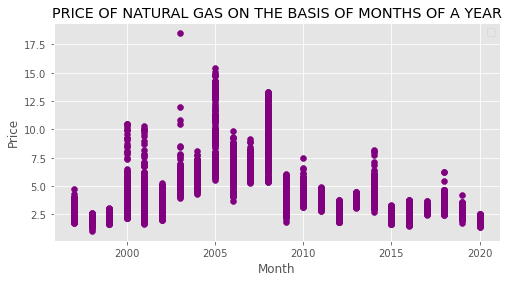

In [17]:
fig=plt.figure(figsize=(8,4))
plt.scatter(df['year'],df['Price'],color='purple')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('PRICE OF NATURAL GAS ON THE BASIS OF MONTHS OF A YEAR')
plt.legend()

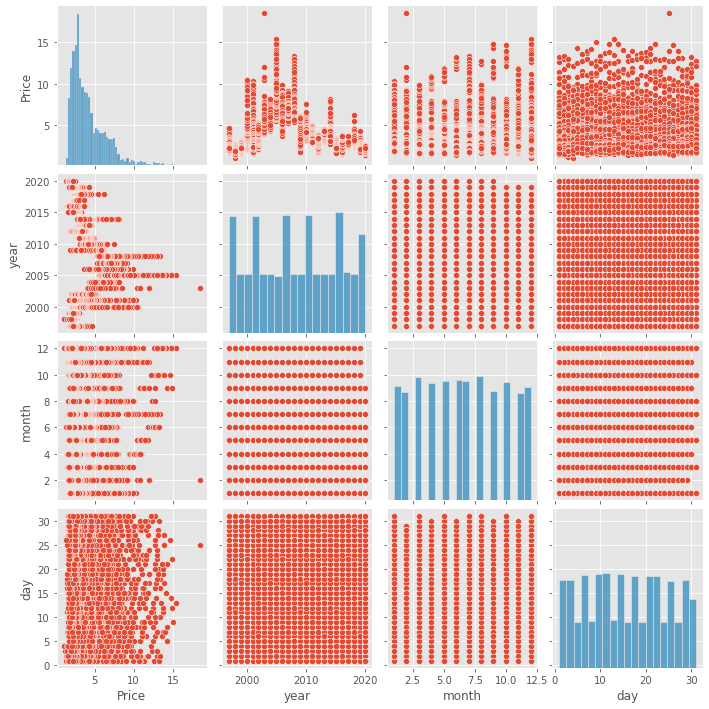

In [18]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [19]:
x=df.iloc[:,2:5].values #inputs
y=df.iloc[:,1:2].values #output price only

In [20]:
x

array([[1997,    1,    7],
       [1997,    1,    8],
       [1997,    1,    9],
       ...,
       [2020,    8,   28],
       [2020,    8,   31],
       [2020,    9,    1]])

In [21]:
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [2.46],
       [2.3 ],
       [2.22]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print(x_train.shape)
print(y_train.shape)

(4762, 3)
(4762, 1)


In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
DecisionTreeRegressor()

DecisionTreeRegressor()

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [26]:
df = pd.read_csv('natural_gas.csv', parse_dates=['Date'])

In [27]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5953 entries, 0 to 5952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5953 non-null   datetime64[ns]
 1   Price   5952 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.1 KB


In [28]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.resample('1M').mean()

,Price
Date,
1997-01-31,3.451053
1997-02-28,2.150526
1997-03-31,1.890500
1997-04-30,2.032727
1997-05-31,2.248095
...,...
2020-05-31,1.748500
2020-06-30,1.631818
2020-07-31,1.767143


In [29]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Price.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.942925
p-value: 0.040579


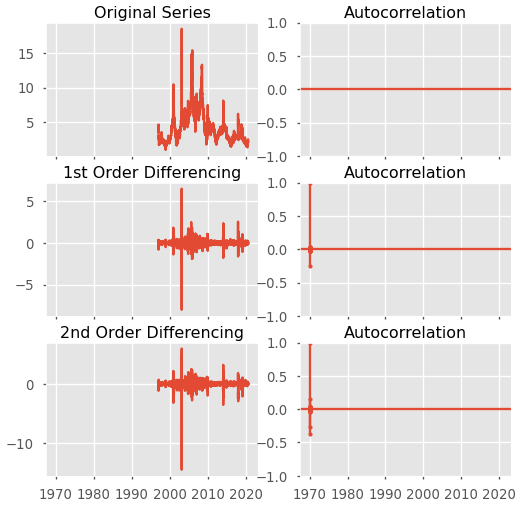

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':60})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Price); axes[0, 0].set_title('Original Series')
plot_acf(df.Price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Price.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

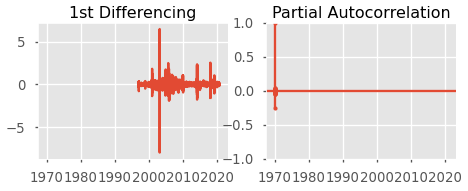

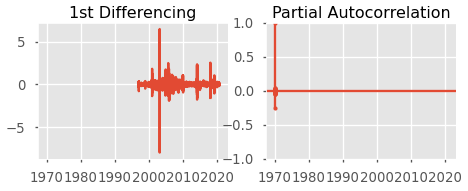

In [31]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':60})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Price.diff().dropna(), ax=axes[1])

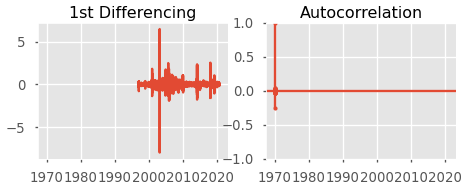

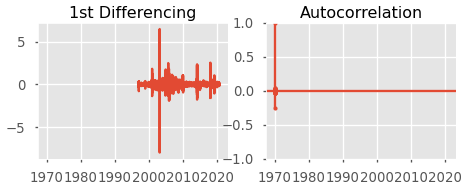

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':60})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Price.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Price.diff().dropna(), ax=axes[1])

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.Price, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5953
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -386.288
Date:                Mon, 30 May 2022   AIC                            780.576
Time:                        21:08:20   BIC                            807.342
Sample:                             0   HQIC                           789.874
                               - 5953                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0725      0.015     -4.728      0.000      -0.103      -0.042
ma.L1          0.0934      0.015      6.383      0.000       0.065       0.122
ma.L2         -0.2643      0.004    -58.929      0.0

In [34]:
model = ARIMA(df.Price, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5953
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -516.412
Date:                Mon, 30 May 2022   AIC                           1038.824
Time:                        21:08:21   BIC                           1058.899
Sample:                             0   HQIC                          1045.798
                               - 5953                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6229      0.012    -51.509      0.000      -0.647      -0.599
ma.L1          0.7510      0.012     60.624      0.000       0.727       0.775
sigma2         0.0696      0.000    477.872      0.0

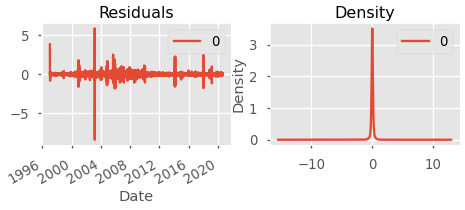

In [35]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Date'>

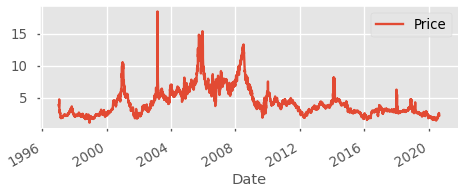

In [36]:
df.plot()

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [39]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [40]:
adfuller_test(df['Price'])

ADF Test Statistic : -2.942924621390992
p-value : 0.04057931777411223
#Lags Used : 32
Number of Observations Used : 5919
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
df['Sales First Difference'] = df['Price'] - df['Price'].shift(1)

In [42]:
df['Price'].shift(1)

Date
1997-01-07     NaN
1997-01-08    3.82
1997-01-09    3.80
1997-01-10    3.61
1997-01-13    3.92
              ... 
2020-08-26    2.54
2020-08-27    2.52
2020-08-28    2.52
2020-08-31    2.46
2020-09-01    2.30
Name: Price, Length: 5952, dtype: float64

In [43]:
df['Seasonal First Difference']=df['Price']-df['Price'].shift(12)

In [44]:
df.head(14)

,Price,Sales First Difference,Seasonal First Difference
Date,,,
1997-01-07,3.82,NaN,NaN
1997-01-08,3.80,-0.02,NaN
1997-01-09,3.61,-0.19,NaN
1997-01-10,3.92,0.31,NaN
1997-01-13,4.00,0.08,NaN
1997-01-14,4.01,0.01,NaN
1997-01-15,4.34,0.33,NaN
1997-01-16,4.71,0.37,NaN
1997-01-17,3.91,-0.80,NaN


In [45]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -14.983233309585223
p-value : 1.1538433124110148e-27
#Lags Used : 34
Number of Observations Used : 5905
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

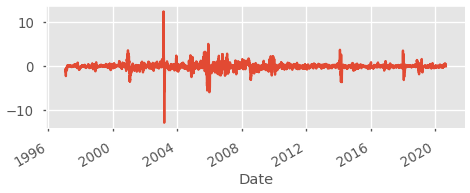

In [46]:
df['Seasonal First Difference'].plot()

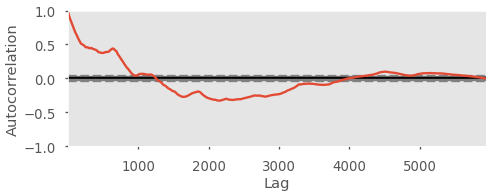

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])
plt.show()

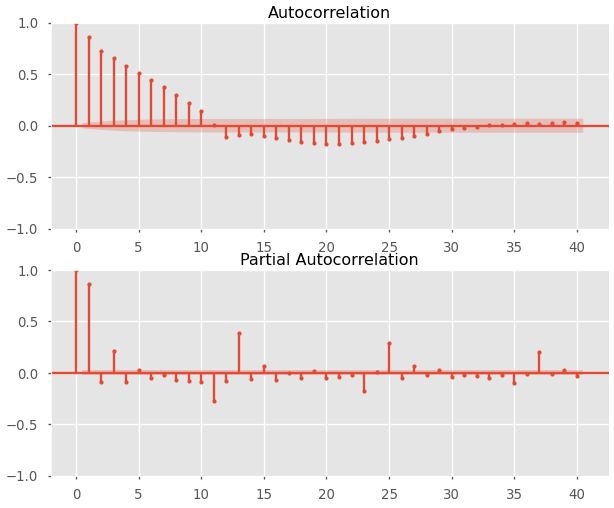

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model=sm.tsa.arima.ARIMA(df.Price,order=(1, 1, 1))
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5952
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -528.689
Date:                Mon, 30 May 2022   AIC                           1063.379
Time:                        21:08:24   BIC                           1083.453
Sample:                             0   HQIC                          1070.353
                               - 5952                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6105      0.012    -50.109      0.000      -0.634      -0.587
ma.L1          0.7386      0.012     59.098      0.000       0.714       0.763
sigma2         0.0699      0.000    475.245      0.0

In [52]:
y_pred=dtr.predict(x_test)
y_pred

array([2.29, 3.24, 1.8 , ..., 3.42, 4.9 , 2.66])

In [53]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.9770843914126028

In [54]:
y_p=dtr.predict([[2022,1,7]])

## There are various factors responsible for the QUEER changes of the price of Natural gas, They are:

## 1.Supply and demand
Naturalgas prices can change rapidly in response to policy changes, new cycles, and fluctuations in the world market. These prices vary greatly and react to many variables such as consumer demand and overall supplies.

Oil-producing companies in Venezuela, Iraq, Saudi Arabia, Iran, and Kuwait formed OPEC in 1960. OPEC is an international body that determines global oil supplies. By controlling oil supply, they can regulate the prices, making it more efficient and economical to consumers.

Additionally, an increase in industrial production and economic growth can elevate the demand for crude oil.

## 2.War events
In the past, political events have triggered the disruption in the supply of Naturalgas, causing prices to shift drastically. The Iran-Iraq and Persian Gulf wars, as well as the Iranian revolution are some of the historical events that have caused massive fluctuations in these prices.

## 3.Pandemics

Apart from war events, other disasters have also had an impact on oil prices.

Here are a few examples of disasters that influenced oil prices:-

1. In January 2020, the Coronavirus (COVID-19) pandemic forced many governments to close down businesses and restrict travel as a safety measure to stem the virus. These drastic actions lead to a drop in the demand for Naturalgas.

2. In August 1990, the Gulf war lowered oil production, leading to a spike in Naturalgas prices. However, these prices later declined after the war ended.

3. In August 2005 and May 2011, Hurricane Katrina and the Mississippi river flooding recorded the largest weekly hike in gasoline prices, which left billions in damage after oil facilities were destroyed. These destructions reduced the flow of crude oil supplies, thus affecting the prices.

## 4.Environmental factors 
Exploration, manufacturing of various commodities and innovations are environmental factors that affect Naturalgas prices.

The same applies to unpredictable weather patterns such as long and cold winter months that cause a drastic drop in temperatures. Such low temperatures lead to an influx in energy consumption, causing an increase in the demand for Naturalgas; thus hiking oil prices.

Additionally, fossil fuels contribute greatly to global warming and the greenhouse effect, further affecting the environment.

## 5.Political factors
Political disruptions in the world biggest oil-producing Middle East countries such as Saudi Arabia, Iran, and the United Arab Emirates [UAE] have influenced the oil market over the years. With a decrease in supply from these countries, oil prices go up affecting the world’s economy in more ways than one.

Another great example of how politics affect Naturalgas prices was witnessed in the 2002 political strikes in Venezuela. They affected major oil producer’s supplies, causing an increase in crude oil prices due to disparities with demand.

In [65]:
Condition=int(input("Enter the condition of the world at the desired time: "))

Enter the condition of the world at the desired time: 3


In [66]:
if(Condition==1):
    k=y_p*(110/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",(k-y_p/2)*78)
elif(Condition==2):
    k=y_p*(115/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",(k-y_p/2)*78)
elif(Condition==3):
    k=y_p*(105/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",(k-y_p/2)*78)
elif(Condition==4):
    k=y_p*(103/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",(k-y_p/2)*78)
elif(Condition==5):
    k=y_p*(112/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",(k-y_p/2)*78)
else:
    k=y_p*(100/200)
    print("The price of Natural gas is",k*78)
    print("The Queer Change is",int((k-y_p/2)*78))

The price of Natural gas is [85.995]
The Queer Change is [4.095]
